In [1]:
#import libraries
import numpy as np
import pandas as pd
import yfinance as yf
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings("ignore")

In [2]:
#set ticker as variable
silver = yf.Ticker("SI=F")

In [3]:
silver_df = silver.history(period="1d", start="2000-01-01", end="2022-10-01").drop(columns=["Dividends","Stock Splits"])
silver_df.index.names =["timestamp"]
silver_df.columns = ["open","high","low","close","volumne"]
silver_df = pd.concat([silver_df], axis=1, keys=["AXG"])
silver_df

AXG                                         
                                open       high        low      close volumne
timestamp                                                                    
2000-08-30 00:00:00-04:00   4.950000   4.950000   4.895000   4.930000    2319
2000-08-31 00:00:00-04:00   4.920000   5.045000   4.920000   5.003000    1612
2000-09-01 00:00:00-04:00   5.035000   5.035000   4.985000   5.004000    1375
2000-09-05 00:00:00-04:00   4.990000   5.005000   4.975000   4.998000     856
2000-09-06 00:00:00-04:00   5.000000   5.000000   4.980000   4.983000     232
...                              ...        ...        ...        ...     ...
2022-09-26 00:00:00-04:00  18.730000  18.850000  18.406000  18.406000      94
2022-09-27 00:00:00-04:00  18.525000  18.525000  18.257000  18.257000      36
2022-09-28 00:00:00-04:00  18.475000  18.796000  18.469999  18.796000      77
2022-09-29 00:00:00-04:00  18.764999  18.764999  18.525000  18.611000     174
2022-09-30 00:00:00-04:00  18.844999  18.969999  18.825001  18.959999      10

[5543 rows x 5 columns]

<AxesSubplot:title={'center':'Silver Value'}, xlabel='Time', ylabel='Price'>

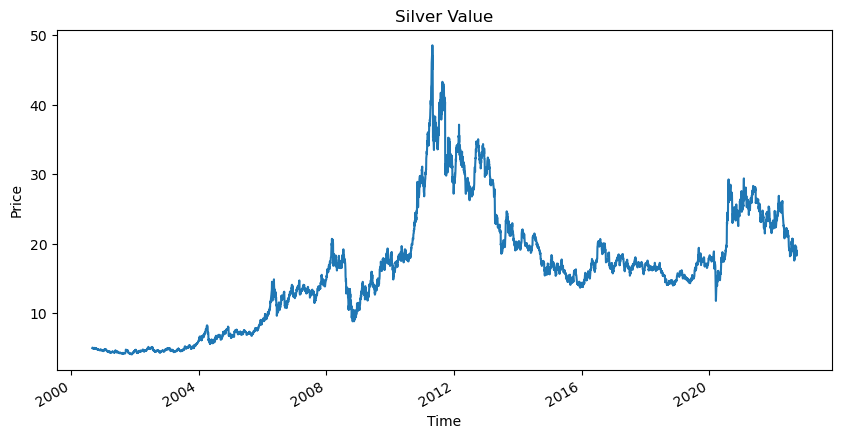

In [4]:
#plot the dataframe as line chart
silver_df["AXG"]["close"].plot(title = "Silver Value", xlabel = "Time", ylabel = "Price", figsize = (10,5))

In [7]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_AXG = MCSimulation(
    portfolio_data = silver_df,
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [8]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_AXG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993067,0.996620,0.997985,1.001859,1.027363,0.987191,1.000864,0.976038,1.016293,0.995415,...,1.013811,0.997022,0.939906,1.030239,0.994468,1.012190,0.972423,1.016162,1.023665,0.980684
2,0.994896,0.967816,0.959850,1.010726,1.017380,0.964838,1.022594,0.981211,0.984606,0.986393,...,1.034142,0.977591,0.936399,1.040284,0.995901,1.021364,0.987522,0.994987,1.046938,0.953040
3,1.002543,0.985145,0.948403,0.998167,0.998697,0.974055,0.980308,1.001944,1.014341,1.009733,...,1.058561,0.959083,0.930158,1.053157,0.947261,1.034465,0.958742,0.947908,1.043710,0.951720
4,0.997695,1.006110,0.952720,0.978938,1.028297,0.977914,1.008218,0.971681,0.995686,1.010267,...,1.077079,0.938841,0.921607,1.102285,0.929189,1.006562,0.967826,0.951303,1.029219,1.000990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.594120,2.345440,1.311748,1.579686,0.375851,2.032745,1.508651,1.828879,0.183312,2.398625,...,1.240542,0.954640,1.539880,0.974593,1.662266,1.599025,1.877196,5.532551,1.233101,1.847827
1257,4.451834,2.312807,1.331616,1.571110,0.374817,2.055992,1.507106,1.833841,0.186405,2.442743,...,1.243390,0.947794,1.527381,0.972241,1.601943,1.641194,1.918404,5.456757,1.241135,1.849457
1258,4.342636,2.244965,1.313958,1.602616,0.372923,1.987052,1.510042,1.817293,0.185821,2.464008,...,1.231001,0.911832,1.458166,0.968922,1.583234,1.624576,1.995815,5.559488,1.225125,1.804733
1259,4.276690,2.280208,1.267936,1.612453,0.373474,1.940630,1.587478,1.788350,0.185185,2.571881,...,1.262958,0.899461,1.438372,0.941744,1.570761,1.610975,1.972136,5.494899,1.223101,1.759281


In [9]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_AXG.simulated_return.mean(axis=1)),
    "median": list(MC_AXG.simulated_return.median(axis=1)),
    "min": list(MC_AXG.simulated_return.min(axis=1)),
    "max": list(MC_AXG.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()



,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000989,1.000878,0.939906,1.060239
2,1.001829,1.001238,0.911549,1.114450
3,1.000844,0.999686,0.900012,1.139234
4,1.001763,1.000353,0.892774,1.127324


In [20]:
# Set initial investment
initial_investment = 350000

# Multiply an initial investment by the daily returns of simulative value prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl 

,mean,median,min,max
0,350000.000000,350000.000000,350000.000000,3.500000e+05
1,350345.992239,350307.328493,328967.198157,3.710837e+05
2,350640.040030,350433.359517,319042.160714,3.900575e+05
3,350295.429238,349890.252545,315004.314923,3.987318e+05
4,350616.881687,350123.567601,312471.031686,3.945635e+05
...,...,...,...,...
1256,600319.309599,478582.459515,60852.297560,4.463908e+06
1257,600618.855690,477290.185128,60318.505748,4.403014e+06
1258,600091.729666,480638.879759,59651.483638,4.393281e+06
1259,599955.393293,482021.382981,61994.102113,4.401631e+06


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of AXG Value Over the Next Year'}, ylabel='mean'>

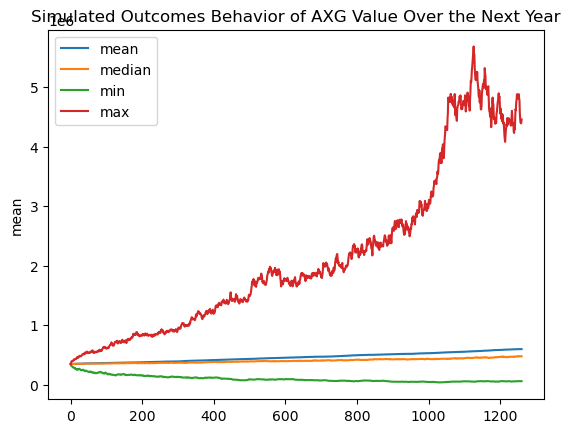

In [18]:
cumulative_pnl.plot(title="Simulated Outcomes Behavior of AXG Value Over the Next Year", ylabel = 'mean')

In [13]:
#display summary statistics for simulations
MC_AXG_sim_sum_stats = MC_AXG.summarize_cumulative_return()
display(MC_AXG_sim_sum_stats)

count           1000.000000
mean               1.714889
std                1.325331
min                0.177931
25%                0.867008
50%                1.370602
75%                2.164563
max               12.738573
95% CI Lower       0.305342
95% CI Upper       4.980473
Name: 1260, dtype: float64

In [14]:
#find minimum return and store variable
MC_AXG_lower_thirty_cumu_return = MC_AXG_sim_sum_stats[8] * 350000
%store MC_AXG_lower_thirty_cumu_return
display(MC_AXG_lower_thirty_cumu_return)

Stored 'MC_AXG_lower_thirty_cumu_return' (float64)


106869.81415389494

In [15]:
#find maximum return and store variable
MC_AXG_upper_thirty_cumu_return = MC_AXG_sim_sum_stats[9] * 350000
%store MC_AXG_upper_thirty_cumu_return
display(MC_AXG_upper_thirty_cumu_return)

Stored 'MC_AXG_upper_thirty_cumu_return' (float64)


1743165.4371973034